In [148]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion

In [149]:
Face_IMG_Path = Path("C:/Users/JLK01\Desktop/face/face/face")
Face_MASK_Path = Path("C:/Users/JLK01/Desktop/face/layout/layout")

In [150]:
IMG_List = list(Face_IMG_Path.glob(r"*.png"))
MASK_List = list(Face_MASK_Path.glob(r"*.png"))

In [151]:
IMG_Series = pd.Series(IMG_List,name="IMG").astype(str)
MASK_Series = pd.Series(MASK_List,name="MASK").astype(str)

In [152]:
Main_Data = pd.concat([IMG_Series,MASK_Series],axis=1)

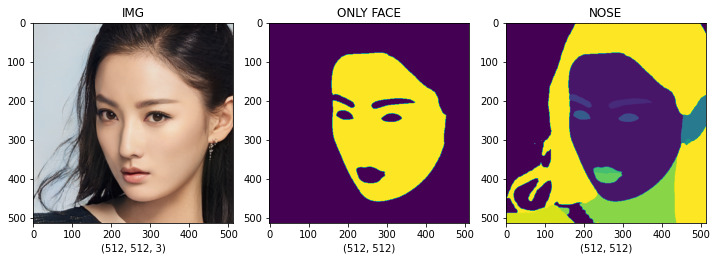

In [153]:
Figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_IMG = Main_Data["IMG"][10]
Example_MASK = Main_Data["MASK"][10]

Reading_IMG = cv2.cvtColor(cv2.imread(Example_IMG),cv2.COLOR_BGR2RGB)
Reading_MASK = cv2.cvtColor(cv2.imread(Example_MASK),cv2.COLOR_BGR2RGB)


img2=(Reading_MASK[:,:,0] == 10)
Reading_MASK[np.where(Reading_MASK[:,:,0] == 10)] = 1
img1=(Reading_MASK[:,:,0] == 1)
b,g,r=cv2.split(Reading_MASK)
cv2.imwrite("mask.png",b)
axis[0].set_xlabel(Reading_IMG.shape)
axis[0].set_title("IMG")
axis[0].imshow(Reading_IMG)

axis[1].set_xlabel(Reading_MASK[:,:,0].shape)
axis[1].set_title("ONLY FACE")
axis[1].imshow(img1)
img3 = cv2.imread("C:/Users/JLK01/Desktop/mask.png")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

axis[2].set_xlabel(Reading_MASK[:,:,0].shape)
axis[2].set_title("NOSE")
axis[2].imshow(b)




plt.tight_layout()
plt.show()

In [154]:
img1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [155]:
img2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [156]:
img1=img1.astype(np.uint8)

In [157]:
np.unique(img1), np.unique(Reading_MASK)

(array([0, 1], dtype=uint8),
 array([ 0,  1,  2,  3,  4,  5,  7,  9, 11, 12, 13, 14, 16, 17],
       dtype=uint8))

In [164]:
img1=cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)

error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xf2302844::Set<3,4,-1>,struct cv::impl::A0xf2302844::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [162]:
np.unique(img1)

array([0, 1], dtype=uint8)